$$ \Huge \text{Multivariate Time Series Forecasting with LSTMs} $$

# How to Convert a Time Series to a Supervised [ref](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

How to transform univariate and multivariate time series forecasting problems into supervised learning problems

## Time Series vs Supervised Learning

A time series is a sequence of numbers that are ordered by a time index. This can be thought of as a list or column of ordered values.

ex:

In [63]:
import pandas as pd
import numpy as np
X = range(9)
# del df['index']
df = pd.DataFrame(X, columns=['X'])
df

X
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8

A supervised learning problem is comprised of input patterns (X) and output patterns (y), such that an algorithm can learn how to predict the output patterns from the input patterns.

In [64]:
y = range(1,10)
df['y'] = y
df

X  y
0  0  1
1  1  2
2  2  3
3  3  4
4  4  5
5  5  6
6  6  7
7  7  8
8  8  9

## Pandas shift() Function

In [65]:
from pandas import DataFrame
df = DataFrame()
df['t'] = range(10)
df['t-1'] = df['t'].shift(1)
df['t+1'] = df['t'].shift(-1)
df

t  t-1  t+1
0  0  NaN  1.0
1  1  0.0  2.0
2  2  1.0  3.0
3  3  2.0  4.0
4  4  3.0  5.0
5  5  4.0  6.0
6  6  5.0  7.0
7  7  6.0  8.0
8  8  7.0  9.0
9  9  8.0  NaN

## The series_to_supervised() Function

**The function takes four arguments:**

1. **data:**    
    * Sequence of observations as a list or 2D NumPy array. Required.
2. **n_in:** 
    * Number of lag observations as input (X). 
    > Values may be between $[1 \cdots len(data)]$ Optional. **Defaults to 1.**
3. **n_out:** 
    * Number of observations as output (y). 
    > Values may be between $[0 \cdots len(data)-1]$. Optional. **Defaults to 1.**
4. **dropnan:** 
    * Boolean whether or not to drop rows with NaN values. Optional. **Defaults to True.**

**The function returns a single value:**

**return:** Pandas DataFrame of series framed for supervised learning.

In [66]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(n_vars)]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

### One-Step Univariate Forecasting

In [67]:
values = [x for x in range(10)]
data = series_to_supervised(values)
data

var1(t-1)  var1(t)
1        0.0        1
2        1.0        2
3        2.0        3
4        3.0        4
5        4.0        5
6        5.0        6
7        6.0        7
8        7.0        8
9        8.0        9

We can repeat this example with an arbitrary number length input sequence, such as 3. This can be done by specifying the length of the input sequence as an argument; for example:

In [68]:
series_to_supervised(values, 3)

var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9

## Multi-Step or Sequence Forecasting

A different type of forecasting problem is using past observations to forecast a sequence of future observations.

In [99]:
series_to_supervised(values, 2, 2, dropnan=True)

var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)   var6(t-2)  \
2          129.0      -16.0       -4.0     1020.0        2.0    1.790000   
3          148.0      -15.0       -4.0     1020.0        2.0    2.680000   
4          159.0      -11.0       -5.0     1021.0        2.0    3.570000   
5          181.0       -7.0       -5.0     1022.0        2.0    5.360000   
6          138.0       -7.0       -5.0     1022.0        2.0    6.250000   
...          ...        ...        ...        ...        ...         ...   
43794        8.0      -23.0        0.0     1032.0        1.0  214.089996   
43795        9.0      -22.0       -1.0     1033.0        1.0  221.240005   
43796       10.0      -22.0       -2.0     1033.0        1.0  226.160004   
43797        8.0      -23.0       -2.0     1034.0        1.0  231.970001   
43798       10.0      -22.0       -3.0     1034.0        1.0  237.779999   

       var7(t-2)  var8(t-2)  var1(t-1)  var2(t-1)  ...  var7(t)  var8(t)  \
2            0.0        0.0      148.0      -15.0  ...      0.0      0.0   
3            0.0        0.0      159.0      -11.0  ...      1.0      0.0   
4            0.0        0.0      181.0       -7.0  ...      2.0      0.0   
5            1.0        0.0      138.0       -7.0  ...      3.0      0.0   
6            2.0        0.0      109.0       -7.0  ...      4.0      0.0   
...          ...        ...        ...        ...  ...      ...      ...   
43794        0.0        0.0        9.0      -22.0  ...      0.0      0.0   
43795        0.0        0.0       10.0      -22.0  ...      0.0      0.0   
43796        0.0        0.0        8.0      -23.0  ...      0.0      0.0   
43797        0.0        0.0       10.0      -22.0  ...      0.0      0.0   
43798        0.0        0.0       10.0      -22.0  ...      0.0      0.0   

       var1(t+1)  var2(t+1)  var3(t+1)  var4(t+1)  var5(t+1)   var6(t+1)  \
2          181.0       -7.0       -5.0     1022.0        2.0    5.360000   
3          138.0       -7.0       -5.0     1022.0        2.0    6.250000   
4          109.0       -7.0       -6.0     1022.0        2.0    7.140000   
5          105.0       -7.0       -6.0     1023.0        2.0    8.930000   
6          124.0       -7.0       -5.0     1024.0        2.0   10.720000   
...          ...        ...        ...        ...        ...         ...   
43794        8.0      -23.0       -2.0     1034.0        1.0  231.970001   
43795       10.0      -22.0       -3.0     1034.0        1.0  237.779999   
43796       10.0      -22.0       -3.0     1034.0        1.0  242.699997   
43797        8.0      -22.0       -4.0     1034.0        1.0  246.720001   
43798       12.0      -21.0       -3.0     1034.0        1.0  249.850006   

       var7(t+1)  var8(t+1)  
2            1.0        0.0  
3            2.0        0.0  
4            3.0        0.0  
5            4.0        0.0  
6            0.0        0.0  
...          ...        ...  
43794        0.0        0.0  
43795        0.0        0.0  
43796        0.0        0.0  
43797        0.0        0.0  
43798        0.0        0.0  

[43797 rows x 32 columns]

## Multivariate Forecasting

In [73]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values)
data

var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59

In [74]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values, 1, 2)
data

var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  var2(t+1)
1        0.0       50.0        1       51        2.0       52.0
2        1.0       51.0        2       52        3.0       53.0
3        2.0       52.0        3       53        4.0       54.0
4        3.0       53.0        4       54        5.0       55.0
5        4.0       54.0        5       55        6.0       56.0
6        5.0       55.0        6       56        7.0       57.0
7        6.0       56.0        7       57        8.0       58.0
8        7.0       57.0        8       58        9.0       59.0

# Air Pollution Forecasting

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv -O pollution-org.csv

This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the **pollution called PM2.5 concentration**, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

- **No:** row number
- **year:** year of data in this row
- **month:** month of data in this row
- **day:** day of data in this row
- **hour:** hour of data in this row
- **pm2.5:** PM2.5 concentration
- **DEWP:** Dew Point
- **TEMP:** Temperature
- **PRES:** Pressure
- **cbwd:** Combined wind direction
- **Iws:** Cumulated wind speed
- **Is:** Cumulated hours of snow
- **Ir:** Cumulated hours of rain

### Import libraries

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Using TensorFlow backend.


### View orginal data

In [84]:
import pandas as pd
df =pd.read_csv('pollution-org.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [77]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [78]:
df.shape

(43824, 13)

In [79]:
df.describe()

No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613     10.268698     50.010635   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      137.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

                 Is            Ir  
count  43824.000000  43824.000000  
mean       0.052734      0.194916  
std        0.760375      1.415867  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

### Preprocess data

In [85]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('pollution-org.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
# save to file
dataset.to_csv('pollution.csv')


In [86]:
dataset.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0

In [87]:
for j in range(0,7):
    u = dataset.iloc[:, j].unique()
    print(f'col: {j}, \nlen: {len(u)}\n, {u}\n')

col: 0, 
len: 581
, [129. 148. 159. 181. 138. 109. 105. 124. 120. 132. 140. 152. 164. 158.
 154. 170. 149. 156. 126.  90.  63.  65.  55.  83.  91.  86.  82.  78.
  98. 107.  96.  95.  70.  61.  53.  71.  72.  76.  73.  79.  58.  25.
  26.  28.  20.  29.  27.  32.  30.  31.  33.  34.  36.  39.  41.  50.
  56.  59.  60.  84. 106.  66.  77.  44.  21.  42.  48.  49.  52.  75.
  93. 131. 127. 130.  43.  37.  24.  23.  40.  51.  57.  54.  67. 198.
 190. 210. 195. 275. 110. 100.  81.  92. 135. 155. 250. 200. 231. 212.
 219. 227. 226. 225. 168. 169. 165. 167. 196. 119.  45.  47.  62.  35.
  68.  88.  22.  17.  16.  18.  15.  13.   9.  11.  19.  12. 257. 174.
 161. 137.  64.  87.  89.  94.  69. 102. 141. 211. 242. 271. 249. 147.
 114. 108. 128. 150. 197. 235. 261. 269. 266. 263. 241. 205. 160. 208.
 209. 183. 182. 230. 172. 166. 177. 191. 268. 317. 291. 313. 282. 303.
 349. 407. 361. 234. 184. 146. 144. 173. 188. 203. 233. 408. 435. 403.
 360. 402. 358. 383. 332. 274. 256. 302. 330. 367. 297. 3

**Virtualization data**

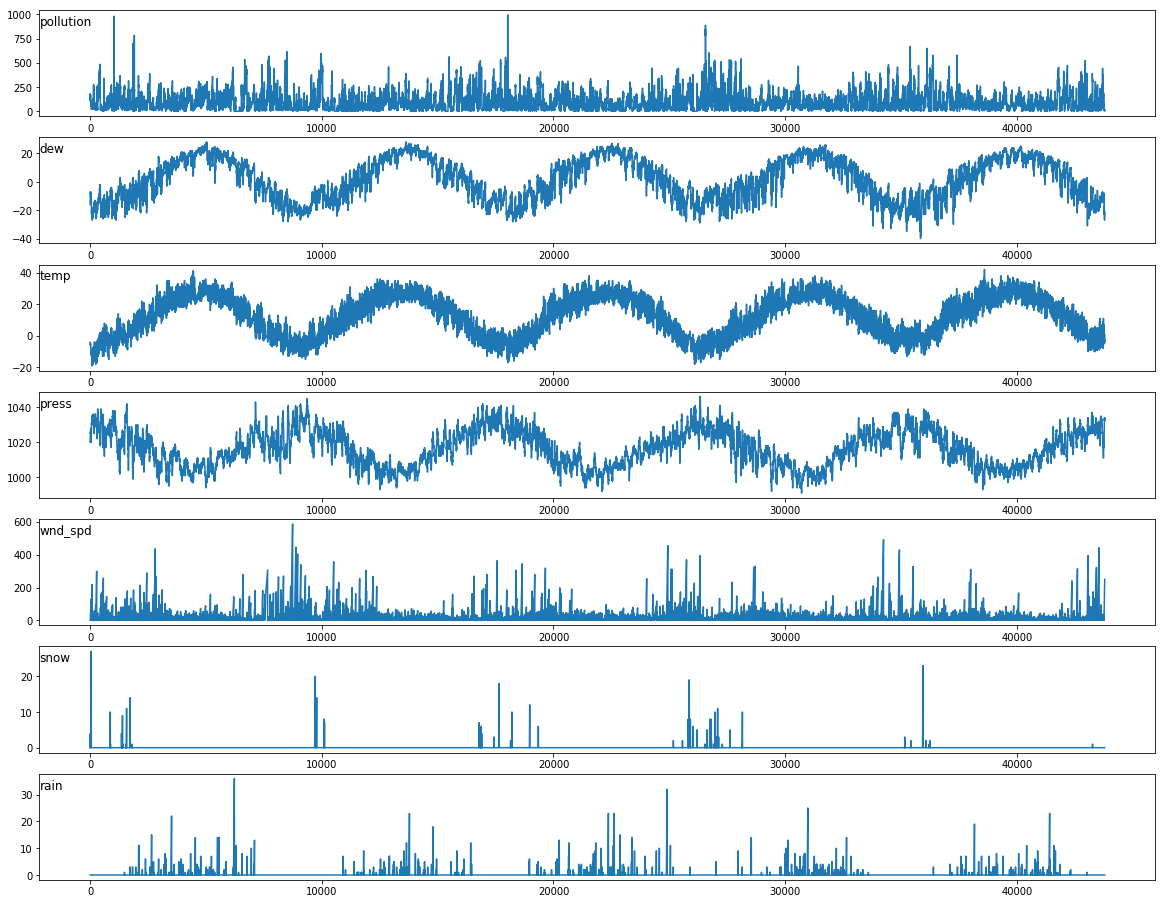

In [88]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure(figsize=(20,16))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.8, loc='left')
    i += 1
pyplot.show()

# 3. Multivariate LSTM Forecast Model

ref: [How to Convert a Time Series to a Supervised Learning Problem in Python](http://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

### Convert series to supervised learning

In [89]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

### Load data

In [90]:
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

### Integer encode direction

In [91]:
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

In [92]:
set(values[:,4])

{0.0, 1.0, 2.0, 3.0}

In [93]:
pd.DataFrame(values)

0     1    2       3    4           5    6    7
0      129.0 -16.0 -4.0  1020.0  2.0    1.790000  0.0  0.0
1      148.0 -15.0 -4.0  1020.0  2.0    2.680000  0.0  0.0
2      159.0 -11.0 -5.0  1021.0  2.0    3.570000  0.0  0.0
3      181.0  -7.0 -5.0  1022.0  2.0    5.360000  1.0  0.0
4      138.0  -7.0 -5.0  1022.0  2.0    6.250000  2.0  0.0
...      ...   ...  ...     ...  ...         ...  ...  ...
43795    8.0 -23.0 -2.0  1034.0  1.0  231.970001  0.0  0.0
43796   10.0 -22.0 -3.0  1034.0  1.0  237.779999  0.0  0.0
43797   10.0 -22.0 -3.0  1034.0  1.0  242.699997  0.0  0.0
43798    8.0 -22.0 -4.0  1034.0  1.0  246.720001  0.0  0.0
43799   12.0 -21.0 -3.0  1034.0  1.0  249.850006  0.0  0.0

[43800 rows x 8 columns]

### Normalize features

In [94]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [95]:
pd.DataFrame(scaled)

0         1         2         3         4         5         6  \
0      0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000   
1      0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000   
2      0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000   
3      0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037   
4      0.138833  0.485294  0.229508  0.563637  0.666667  0.009912  0.074074   
...         ...       ...       ...       ...       ...       ...       ...   
43795  0.008048  0.250000  0.278689  0.781818  0.333333  0.395659  0.000000   
43796  0.010060  0.264706  0.262295  0.781818  0.333333  0.405588  0.000000   
43797  0.010060  0.264706  0.262295  0.781818  0.333333  0.413996  0.000000   
43798  0.008048  0.264706  0.245902  0.781818  0.333333  0.420866  0.000000   
43799  0.012072  0.279412  0.262295  0.781818  0.333333  0.426216  0.000000   

         7  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
43795  0.0  
43796  0.0  
43797  0.0  
43798  0.0  
43799  0.0  

[43800 rows x 8 columns]

**frame as supervised learning**

In [96]:
reframed = series_to_supervised(scaled, 1, 1)

In [97]:
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
1   0.000000        0.0  0.148893  0.367647  0.245902  0.527273  0.666667   
2   0.000000        0.0  0.159960  0.426471  0.229508  0.545454  0.666667   
3   0.000000        0.0  0.182093  0.485294  0.229508  0.563637  0.666667   
4   0.037037        0.0  0.138833  0.485294  0.229508  0.563637  0.666667   
5   0.074074        0.0  0.109658  0.485294  0.213115  0.563637  0.666667   

    var6(t)   var7(t)  var8(t)  
1  0.003811  0.000000      0.0  
2  0.005332  0.000000      0.0  
3  0.008391  0.037037      0.0  
4  0.009912  0.074074      0.0  
5  0.011433  0.111111      0.0

**drop columns we don't want to predict**

In [98]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658

### Split into train and test sets

In [100]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

### Split into input and outputs

In [101]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 8) (8760,) (35039, 8) (35039,)


### Build timesteps: reshape input to be 3D:  $\Large [samples, timesteps, features]$

In [102]:
train_X_ts = train_X.reshape((-1, 1, train_X.shape[1]))
test_X_ts = test_X.reshape((-1, 1, test_X.shape[1]))
print(train_X_ts.shape, train_y.shape, test_X_ts.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


### Define Model

In [103]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_ts.shape[1], train_X_ts.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


### Fit network

In [104]:

history = model.fit(train_X_ts, train_y, epochs=50, batch_size=72, 
                    validation_data=(test_X_ts, test_y), verbose=2, shuffle=False)


Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 3s - loss: 0.0069 - val_loss: 0.0069
Epoch 2/50
 - 3s - loss: 0.0038 - val_loss: 0.0076
Epoch 3/50
 - 3s - loss: 0.0021 - val_loss: 0.0071
Epoch 4/50
 - 3s - loss: 0.0014 - val_loss: 0.0058
Epoch 5/50
 - 3s - loss: 0.0012 - val_loss: 0.0044
Epoch 6/50
 - 3s - loss: 0.0011 - val_loss: 0.0034
Epoch 7/50
 - 3s - loss: 0.0010 - val_loss: 0.0027
Epoch 8/50
 - 3s - loss: 0.0010 - val_loss: 0.0023
Epoch 9/50
 - 3s - loss: 9.8621e-04 - val_loss: 0.0020
Epoch 10/50
 - 3s - loss: 9.7322e-04 - val_loss: 0.0019
Epoch 11/50
 - 3s - loss: 9.6564e-04 - val_loss: 0.0018
Epoch 12/50
 - 3s - loss: 9.6139e-04 - val_loss: 0.0017
Epoch 13/50
 - 3s - loss: 9.5910e-04 - val_loss: 0.0016
Epoch 14/50
 - 3s - loss: 9.5787e-04 - val_loss: 0.0015
Epoch 15/50
 - 3s - loss: 9.5714e-04 - val_loss: 0.0015
Epoch 16/50
 - 3s - loss: 9.5663e-04 - val_loss: 0.0014
Epoch 17/50
 - 3s - loss: 9.5624e-04 - val_loss: 0.0013
Epoch 18/50
 - 3s - loss: 9.5597e-04 - v

### Plot history

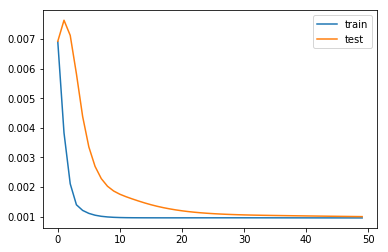

In [105]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Make a prediction

In [106]:
yhat = model.predict(test_X_ts)

In [109]:
test_X_re = test_X.reshape((test_X_ts.shape[0], test_X_ts.shape[2]))

In [111]:
test_X_re.shape

(35039, 8)

### Invert scaling for forecast

In [112]:
inv_yhat = concatenate((yhat, test_X_re[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [113]:
inv_yhat[:1]

array([32.142323], dtype=float32)

### Invert scaling for actual

In [114]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X_re[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

### Calculate RMSE

In [115]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 31.390


In [116]:
inv_y[:5]

array([31., 20., 19., 18., 17.], dtype=float32)

In [117]:
inv_yhat[:5]

array([32.142323, 31.562157, 20.993963, 16.299053, 19.254734],
      dtype=float32)

# Tuning model 

How to adapt the above example to train the model on **multiple previous time steps**.


In [118]:
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()
pd.set_option('display.max_columns', None)  


In [119]:
reframed[:5]

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
4   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
5   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
6   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
7   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  \
3   0.000000        0.0   0.148893   0.367647   0.245902   0.527273   
4   0.000000        0.0   0.159960   0.426471   0.229508   0.545454   
5   0.000000        0.0   0.182093   0.485294   0.229508   0.563637   
6   0.037037        0.0   0.138833   0.485294   0.229508   0.563637   
7   0.074074        0.0   0.109658   0.485294   0.213115   0.563637   

   var5(t-2)  var6(t-2)  var7(t-2)  var8(t-2)  var1(t-1)  var2(t-1)  \
3   0.666667   0.003811   0.000000        0.0   0.159960   0.426471   
4   0.666667   0.005332   0.000000        0.0   0.182093   0.485294   
5   0.666667   0.008391   0.037037        0.0   0.138833   0.485294   
6   0.666667   0.009912   0.074074        0.0   0.109658   0.485294   
7   0.666667   0.011433   0.111111        0.0   0.105634   0.485294   

   var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)   var1(t)  \
3   0.229508   0.545454   0.666667   0.005332   0.000000        0.0  0.182093   
4   0.229508   0.563637   0.666667   0.008391   0.037037        0.0  0.138833   
5   0.229508   0.563637   0.666667   0.009912   0.074074        0.0  0.109658   
6   0.213115   0.563637   0.666667   0.011433   0.111111        0.0  0.105634   
7   0.213115   0.581818   0.666667   0.014492   0.148148        0.0  0.124748   

    var2(t)   var3(t)   var4(t)   var5(t)   var6(t)   var7(t)  var8(t)  
3  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037      0.0  
4  0.485294  0.229508  0.563637  0.666667  0.009912  0.074074      0.0  
5  0.485294  0.213115  0.563637  0.666667  0.011433  0.111111      0.0  
6  0.485294  0.213115  0.581818  0.666667  0.014492  0.148148      0.0  
7  0.485294  0.229508  0.600000  0.666667  0.017551  0.000000      0.0

We have 3 * 8 + 8 columns in our framed dataset. We will take 3 * 8 or 24 columns as input for the obs of all features across the previous 3 hours. We will take just the pollution variable as output at the following hour, as follows:

In [120]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(8760, 9) 8760 (8760,)


(43797, 32)
(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)
Train on 8760 samples, validate on 35037 samples
Epoch 1/50
 - 5s - loss: 0.0545 - val_loss: 0.0802
Epoch 2/50
 - 4s - loss: 0.0262 - val_loss: 0.0452
Epoch 3/50
 - 4s - loss: 0.0214 - val_loss: 0.0297
Epoch 4/50
 - 4s - loss: 0.0207 - val_loss: 0.0242
Epoch 5/50
 - 4s - loss: 0.0205 - val_loss: 0.0220
Epoch 6/50
 - 4s - loss: 0.0202 - val_loss: 0.0196
Epoch 7/50
 - 4s - loss: 0.0194 - val_loss: 0.0186
Epoch 8/50
 - 4s - loss: 0.0191 - val_loss: 0.0180
Epoch 9/50
 - 4s - loss: 0.0187 - val_loss: 0.0173
Epoch 10/50
 - 4s - loss: 0.0181 - val_loss: 0.0169
Epoch 11/50
 - 4s - loss: 0.0176 - val_loss: 0.0163
Epoch 12/50
 - 4s - loss: 0.0174 - val_loss: 0.0161
Epoch 13/50
 - 4s - loss: 0.0167 - val_loss: 0.0162
Epoch 14/50
 - 4s - loss: 0.0167 - val_loss: 0.0157
Epoch 15/50
 - 4s - loss: 0.0162 - val_loss: 0.0156
Epoch 16/50
 - 4s - loss: 0.0160 - val_loss: 0.0154
Epoch 17/50
 - 4s - loss: 0.0156 - val_loss: 0.0

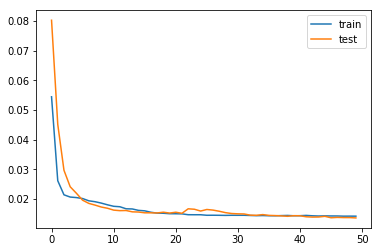

Test RMSE: 26.294


In [121]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_hours = 3
n_features = 8

# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


(43795, 48)
(8760, 40) 8760 (8760,)
(8760, 5, 8) (8760,) (35035, 5, 8) (35035,)
Train on 8760 samples, validate on 35035 samples
Epoch 1/50
 - 6s - loss: 0.0555 - val_loss: 0.0346
Epoch 2/50
 - 5s - loss: 0.0283 - val_loss: 0.0244
Epoch 3/50
 - 5s - loss: 0.0248 - val_loss: 0.0226
Epoch 4/50
 - 5s - loss: 0.0235 - val_loss: 0.0223
Epoch 5/50
 - 5s - loss: 0.0222 - val_loss: 0.0224
Epoch 6/50
 - 5s - loss: 0.0212 - val_loss: 0.0213
Epoch 7/50
 - 5s - loss: 0.0205 - val_loss: 0.0205
Epoch 8/50
 - 5s - loss: 0.0200 - val_loss: 0.0194
Epoch 9/50
 - 5s - loss: 0.0187 - val_loss: 0.0186
Epoch 10/50
 - 5s - loss: 0.0183 - val_loss: 0.0180
Epoch 11/50
 - 5s - loss: 0.0175 - val_loss: 0.0180
Epoch 12/50
 - 5s - loss: 0.0172 - val_loss: 0.0182
Epoch 13/50
 - 5s - loss: 0.0166 - val_loss: 0.0175
Epoch 14/50
 - 5s - loss: 0.0164 - val_loss: 0.0177
Epoch 15/50
 - 5s - loss: 0.0160 - val_loss: 0.0169
Epoch 16/50
 - 5s - loss: 0.0158 - val_loss: 0.0172
Epoch 17/50
 - 5s - loss: 0.0154 - val_loss: 0.0

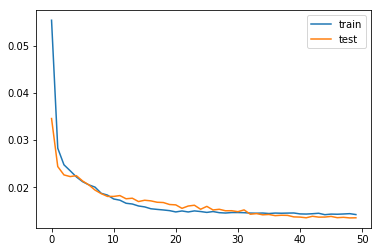

Test RMSE: 26.199


In [122]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_hours = 5
n_features = 8

# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_hours = 24
n_features = 8

# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
